In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_footsteps_continuous_absolute
%store -r Y_footsteps_continuous_absolute
print(X_footsteps_continuous_absolute.shape)
print(Y_footsteps_continuous_absolute.shape)

(762, 26)
(762, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
# Entries where RL swings
idxs = np.where(X_footsteps_continuous_absolute[:, -2] == 0)[0]
X_footsteps_continuous_absolute_RL_swing = X_footsteps_continuous_absolute[idxs]
Y_footsteps_continuous_absolute_RL_swing = Y_footsteps_continuous_absolute[idxs]

In [26]:
print("Percentage of footstep where FR and RL are swinging: ", len(idxs)/len(X_footsteps_continuous_absolute) * 100)

Percentage of footstep where FR and RL are swinging:  50.0


## Predict RL foot -> x

### Linear Regression

In [27]:
# Input
X = np.hstack((X_footsteps_continuous_absolute_RL_swing[:, :3], # motion command
               X_footsteps_continuous_absolute_RL_swing[:, 3:9],
               X_footsteps_continuous_absolute_RL_swing[:, 9:11], # FL (x,y) position
               X_footsteps_continuous_absolute_RL_swing[:, 12:14], # FR (x,y) position
               X_footsteps_continuous_absolute_RL_swing[:, 15:17], # RL (x,y) position
               X_footsteps_continuous_absolute_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_footsteps_continuous_absolute_RL_swing[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rl_relative_swinging_x = LinearRegression()

# Fit the model
model_rl_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9991191212696405
RMSE:  0.002468068793512326
The lowest error is:  2.7038561084380408e-05
The highest error is:  0.016164742414050692
The avg. error is:  0.0013800863328549892


In [28]:
model_rl_relative_swinging_x.coef_

array([[ 4.47406388e-01,  1.42247325e-16,  1.43635104e-15,
        -4.80618872e-02,  8.88366985e-02, -1.15191842e-02,
        -3.38108841e-03, -5.73246701e-03, -1.71874807e-02,
         1.26290203e-01,  4.77396746e-01, -1.50271520e-01,
        -5.43547657e-01,  3.52210216e-01, -5.00275874e-01,
        -6.28659351e-01,  3.62600000e-01]])

In [29]:
model_rl_relative_swinging_x.intercept_

array([-0.09556052])

Text(0, 0.5, 'Predictions')

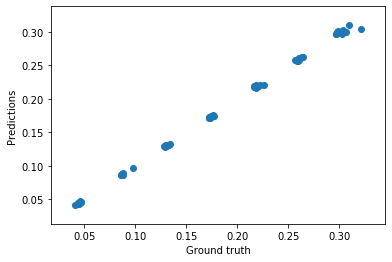

In [30]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [31]:
#%store model_rl_relative_swinging_x

In [32]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [33]:
# Save model
#joblib.dump(model_rl_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_x.sav")

### Predict RL foot -> y

In [34]:
# Input
X = np.hstack((X_footsteps_continuous_absolute_RL_swing[:, :3], # motion command
               X_footsteps_continuous_absolute_RL_swing[:, 3:9],
               X_footsteps_continuous_absolute_RL_swing[:, 9:11], # FL (x,y) position
               X_footsteps_continuous_absolute_RL_swing[:, 12:14], # FR (x,y) position
               X_footsteps_continuous_absolute_RL_swing[:, 15:17], # RL (x,y) position
               X_footsteps_continuous_absolute_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_footsteps_continuous_absolute_RL_swing[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rl_relative_swinging_y = LinearRegression()

# Fit the model
model_rl_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.7966293484842906
RMSE:  0.000917602355931039
The lowest error is:  1.876466757887163e-06
The highest error is:  0.004341559408918054
The avg. error is:  0.0006404580728937983


In [35]:
model_rl_relative_swinging_y.coef_

array([[ 4.17913765e-02,  1.24900090e-16, -1.90819582e-17,
        -2.09558552e-02,  1.96417469e-01, -1.98383483e-02,
        -2.25075683e-03, -5.24765258e-03,  2.43074364e-02,
         6.03616940e-02,  4.18346142e-02, -2.54678417e-01,
        -4.11239224e-01, -6.81949440e-02, -3.59850741e-01,
         4.72415978e-02, -5.74022774e-01]])

In [36]:
model_rl_relative_swinging_y.intercept_

array([-0.03864264])

Text(0, 0.5, 'Predictions')

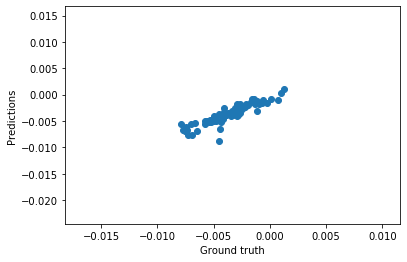

In [37]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [38]:
#%store model_rl_relative_swinging_y

In [39]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [24]:
# Save model
#joblib.dump(model_rl_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_y.sav")